In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
CHECKPOINT_PATH = '../train/pretrained_models/sam_vit_h_4b8939.pth'

In [6]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [7]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

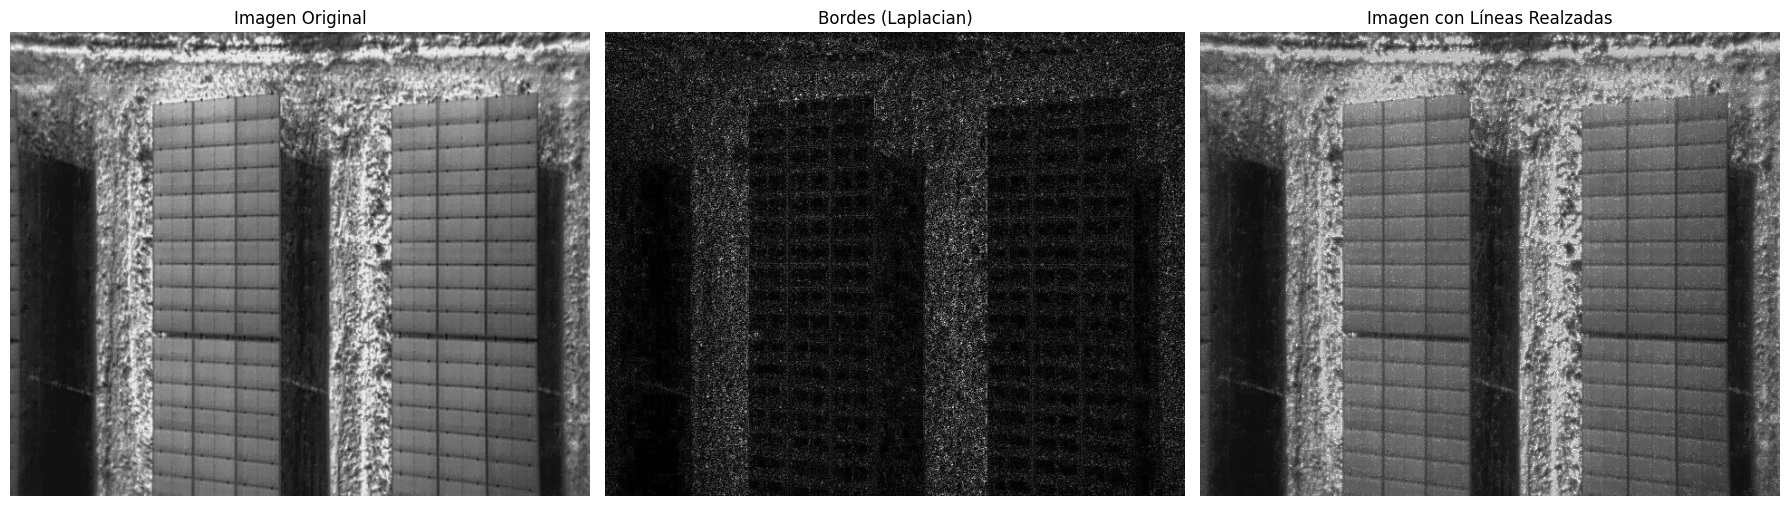

In [98]:
IMAGE_PATH = "../data/panel_2.JPG" 

img = cv2.imread(IMAGE_PATH)
if img is None:
    raise Exception("No Image")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

laplacian_bgr = cv2.cvtColor(laplacian, cv2.COLOR_GRAY2BGR)

alpha = 0.8
beta  = 0.5
img_enhanced = cv2.addWeighted(img, alpha, laplacian_bgr, beta, 0)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_enhanced_rgb = cv2.cvtColor(img_enhanced, cv2.COLOR_BGR2RGB)
laplacian_rgb = cv2.cvtColor(laplacian_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(laplacian_rgb)
plt.title("Bordes (Laplacian)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_enhanced_rgb)
plt.title("Imagen con Líneas Realzadas")
plt.axis("off")

plt.tight_layout()
plt.show()


In [119]:
nombre_imagen_nueva = 'panel_2.jpg'
IMAGE_PATH = f"../data/{nombre_imagen_nueva}"

In [121]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [122]:
import os
print(IMAGE_PATH)

../data/panel_2.jpg


In [123]:
# SEGMENTATION PROCESS
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [104]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


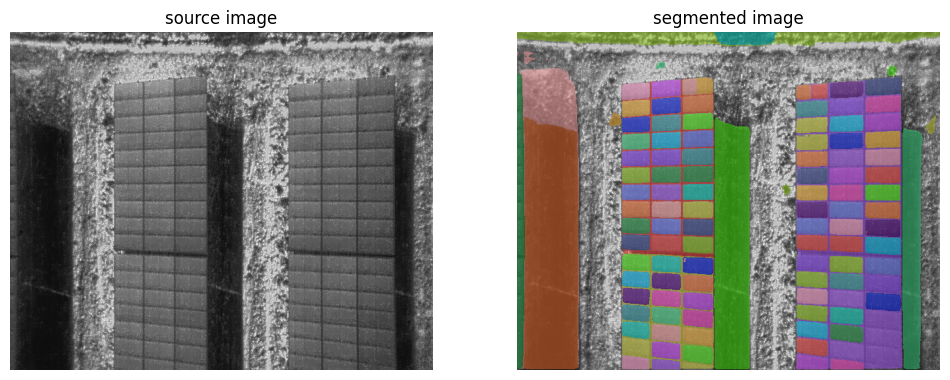

In [105]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)